# Euler Demo

This is an example of a report-style code that you'll be writing for this class. In this case, the report is written using **Python**, but you can use Python, Julia, or Matlab/Octave. For theoretical reports, you'll use either Markdown or LaTeX (your choice).

In this example, we'll integrate a Curtiss-Hirschfelder equation, given by $$y' = -5[y-\cos(t)]$$

Let's define the function specifying the ODE.

In [1]:
import numpy as np;
def CHE(y,t):
    return -5*(y-np.cos(t));


This is now a function that we can plot against $t$ and $y$ to get the value of the slope.

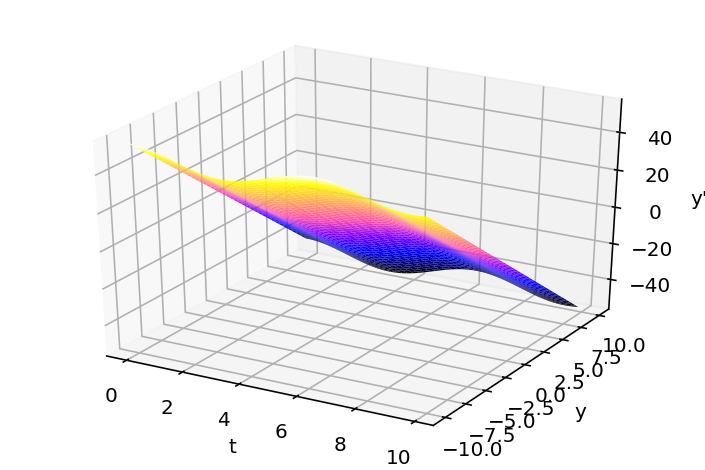

In [2]:
t = np.arange(0, 10, 0.1); #define the grid time vs state
y = np.arange(-10, 10, 0.1);
[T,Y] = np.meshgrid(t,y);

YP = CHE(Y,T); # evaluate the derivative on the grid

# set up the graph
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

from matplotlib import cm
ax.plot_surface(T,Y,YP,cmap=cm.gnuplot2);

ax.set_xlabel("t");
ax.set_ylabel("y");
ax.set_zlabel("y''");

Now, to numerically integrate this equation, we need to define a function that _takes_ the function `CHE` as _argument_ (in addition to initial condition, time step, and duration of simulation).

In [3]:
def fwd_euler(f, x0, dt, tstart, tend):

    ti = np.arange(tstart,tend,dt); # define the time vector
    xi = np.empty_like(ti);
    
    xi[0] = x0;

    for k in range(1, ti.size ):
        xi[k] = xi[k-1]+dt*f(xi[k-1], ti[k-1]); # evaluate forward Euler update.
    return xi,ti


This function doesn't do anything on its own. We have to call it and then plot the results.

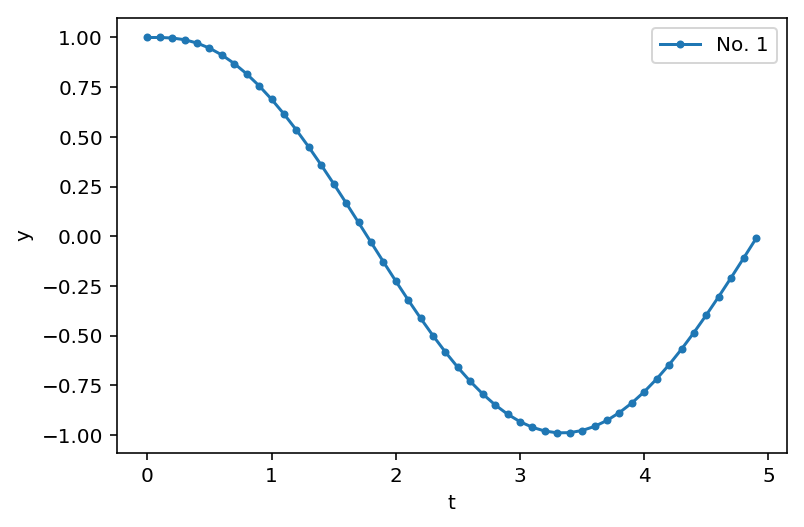

In [4]:
y1,t1 = fwd_euler( CHE, 1, 0.1, 0, 5);
plt.plot(t1, y1, marker='.',label='No. 1');
plt.xlabel('t'); plt.ylabel('y');
plt.legend();

We can add a few more initial conditions and time steps.

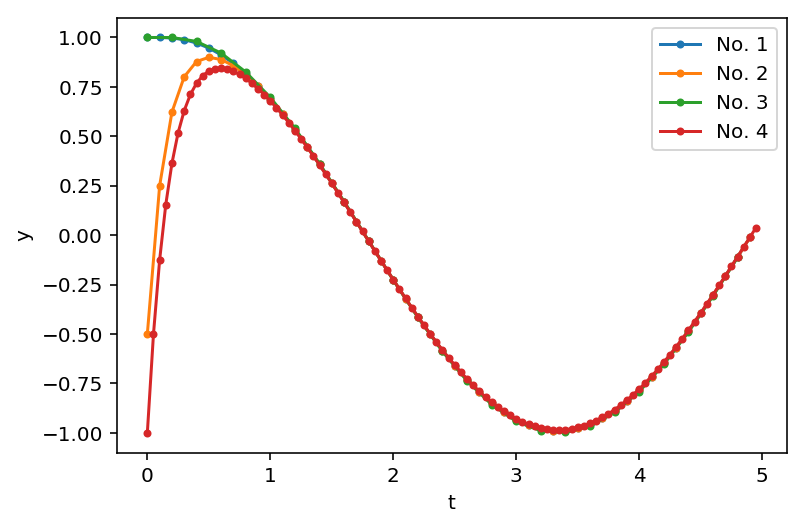

In [5]:
y2,t2 = fwd_euler(CHE, -0.5, 0.1, 0,5);
y3,t3 = fwd_euler(CHE, 1, 0.2, 0,5);
y4,t4 = fwd_euler(CHE, -1, 0.05, 0,5);
plt.plot(t1, y1, marker='.',label='No. 1');
plt.plot(t2, y2, marker='.',label='No. 2');
plt.plot(t3, y3, marker='.',label='No. 3');
plt.plot(t4, y4, marker='.',label='No. 4');

plt.xlabel('t'); plt.ylabel('y');
plt.legend();


It looks like all solutions collapse onto the same curve. Well, that's not really what we're interested, we'll be interested in understanding why *increasing* the time step seems to destroy things... Let's take the first initial condition but simulate it with a timestep of `dt=0.5`.

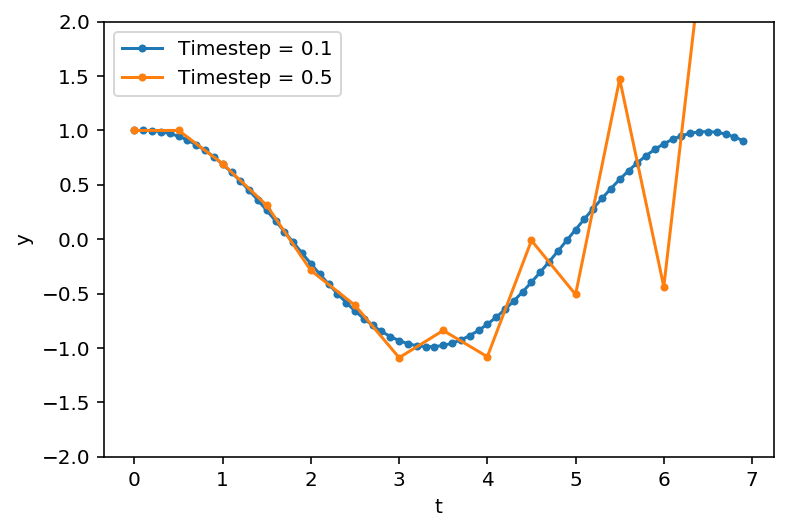

In [6]:
y1,t1 = fwd_euler( CHE, 1, 0.1, 0, 7);
y5,t5 = fwd_euler( CHE, 1, 0.5, 0, 7);
plt.plot(t1, y1, marker='.',label='Timestep = 0.1');
plt.plot(t5, y5, marker='.',label='Timestep = 0.5');

plt.xlabel('t'); plt.ylabel('y');
plt.legend();

plt.ylim([-2,2]);

Ooops... that's no good.